<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [ ]:
#Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.23.5 pandas==1.5.3 -q --user --no-warn-script-location

## Importing necessary libraries

In [ ]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
import numpy as np
import pandas as pd
import time
# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
from tensorflow import keras
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score
from imblearn.over_sampling import SMOTE


# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# mouting the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Loading the dataset

In [ ]:
# reading dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project7/bank-1.csv')

## Data Overview

#### View the first and last 5 rows of the dataset

In [ ]:
# Check the top five records of the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# View the last 5 rows of the dataset
df.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


#### Understand the shape of the dataset

In [ ]:
# View the shape of the dataset
df.shape

(10000, 14)

#### Check the data types of the columns for the dataset

In [ ]:
# Let's check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* We notice that none of the columns have null values
* The data types are object, int64 and float64

**Let's check the number of unique values in each column**


In [ ]:
# Check the number of unique values in each column
for col in df.columns:
    print(f"Column '{col}': {df[col].nunique()} unique values")


Column 'RowNumber': 10000 unique values
Column 'CustomerId': 10000 unique values
Column 'Surname': 2932 unique values
Column 'CreditScore': 460 unique values
Column 'Geography': 3 unique values
Column 'Gender': 2 unique values
Column 'Age': 70 unique values
Column 'Tenure': 11 unique values
Column 'Balance': 6382 unique values
Column 'NumOfProducts': 4 unique values
Column 'HasCrCard': 2 unique values
Column 'IsActiveMember': 2 unique values
Column 'EstimatedSalary': 9999 unique values
Column 'Exited': 2 unique values


- We will drop the columns `RowNumber`, `CustomerId` and `Surname`, because they are not providing value to the prediction
- `Exited` column has 2 unique values



## Exploratory Data Analysis

#### Let's check the statistical summary of the data

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- All columns have normal values, probably there are some outliers which we will look at them below

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Get categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Print the number of unique values of each categorical column
df[cat_cols].nunique()

,0
Surname,2932
Geography,3
Gender,2


- `Surname` has 2932 unique values, `Geography` has 3 unique values and `Gender` has 2 unique values

In [ ]:
# Drop columns that are not useful for the training
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Credit Scores

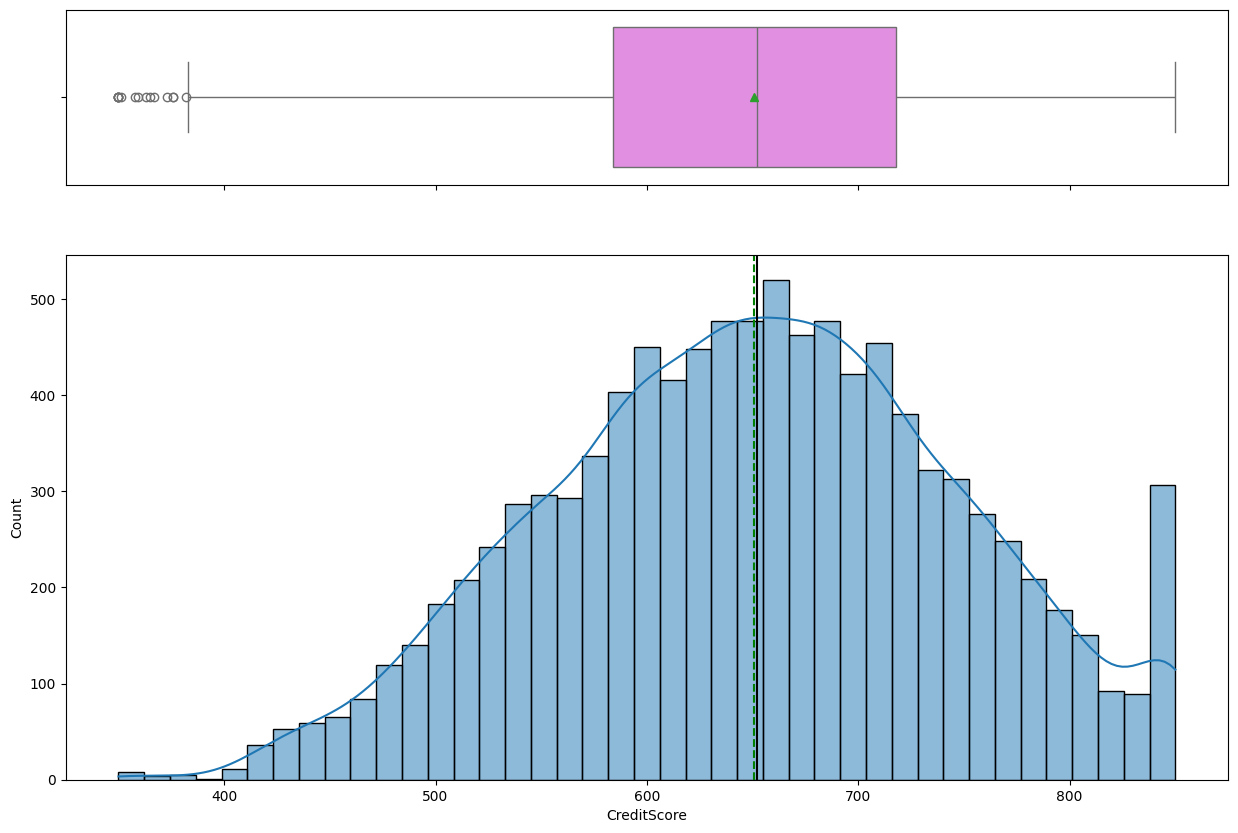

In [ ]:
# View the histogram and the boxplot of the Credit Scores of the clients
histogram_boxplot(df, 'CreditScore',kde=True)

- The distribution of the Credit Score Values is normal (bell-shaped)
- The boxplot shows that there are outliers at the left start
- We will not treat these outliers as they represent real data

#### Observations on Customer's Location

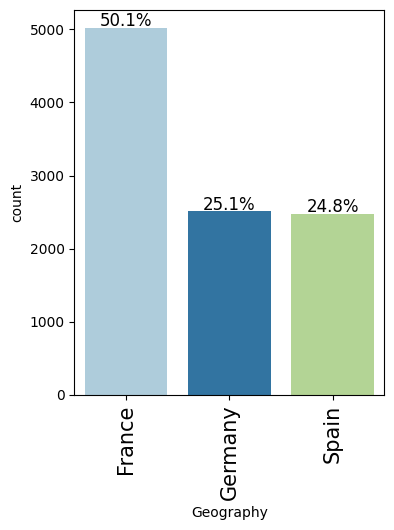

In [ ]:
# View the plot of Location of client
labeled_barplot(df,'Geography',perc=True)

* Majority of customers i.e. 50% is from France,
* Approx 50% are from Germany or Spain

#### Observations on Genders

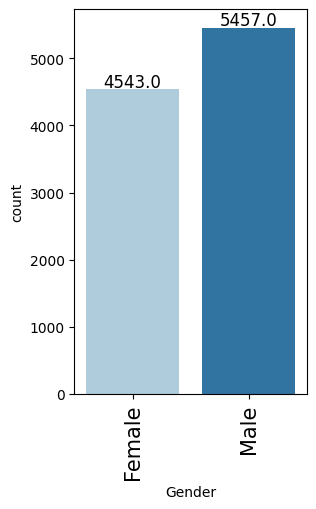

In [ ]:
# View the plot of Gender of client
labeled_barplot(df,'Gender')

* Majority of customers approx 54% are Males
* Approx 45% are females

#### Observations on Tenures

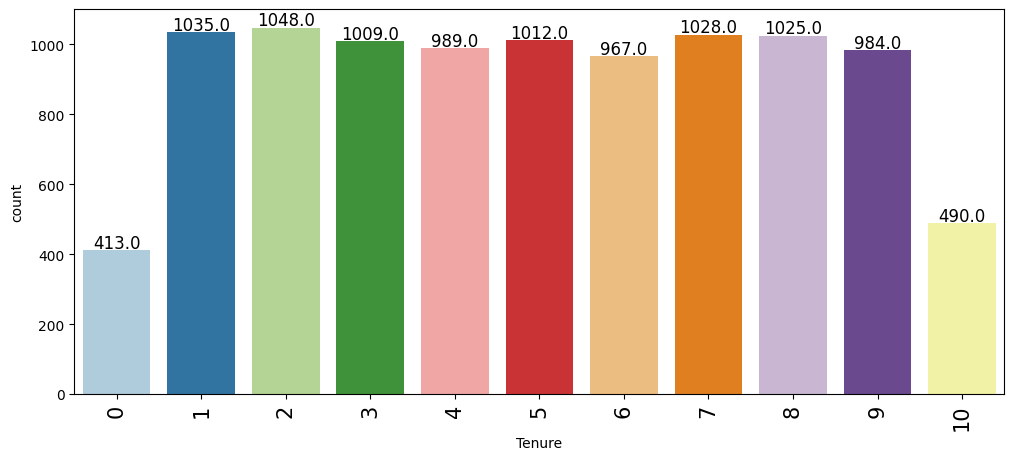

In [ ]:
# View the plot of Tenures of client
labeled_barplot(df,'Tenure')

* Majority of customers i.e. 80% has from 1 to 9 tenures
* Approx 10% has 0 or 10 tenures

#### Observations on Number of products customer purchased

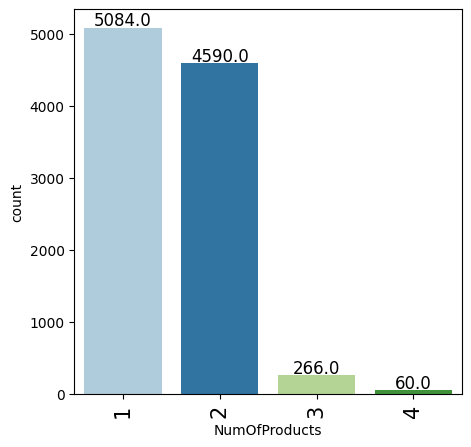

In [ ]:
# View the plot of Number of Products of client
labeled_barplot(df,'NumOfProducts')

* Majority of customers i.e. 97% has purchased 1 or 2 products
* Approx 3% has purchased 3 or 4

#### Observations on Account Balance

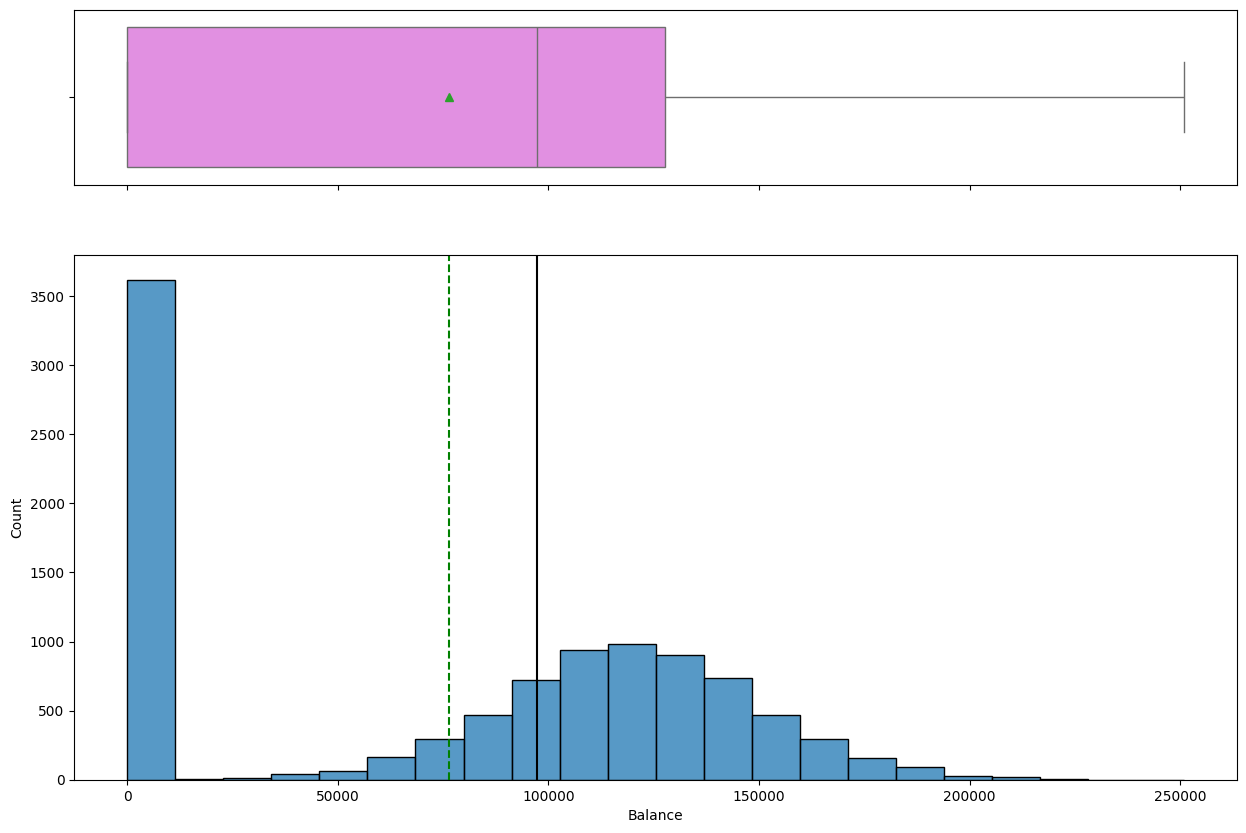

In [ ]:
# View the histogram and the boxplot of the Balance of the clients
histogram_boxplot(df, 'Balance')

- The distribution of the Balance of the customers it's almost normal, but there are a lot of zero values
- The boxplot shows that there are no outliers

#### Observations on Age of Customers

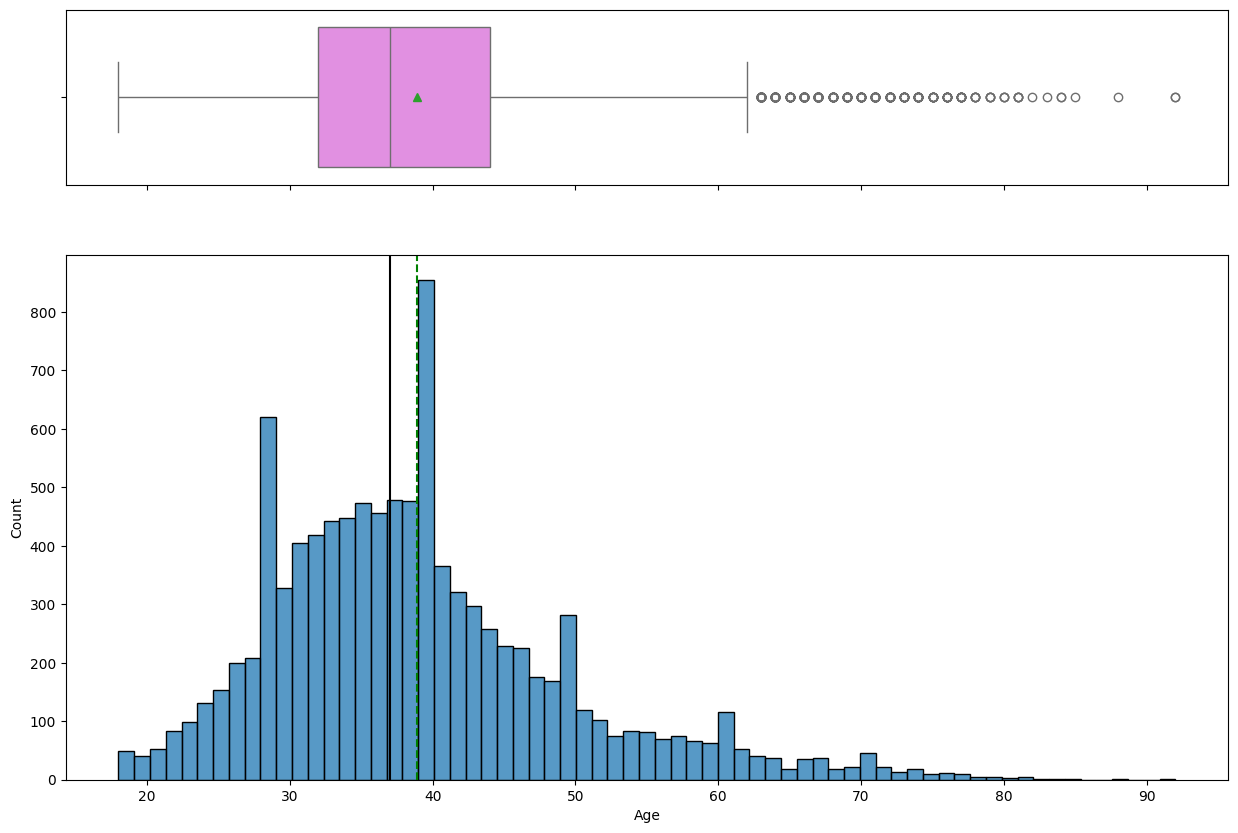

In [ ]:
# View the histogram and the boxplot of the Age of customers
histogram_boxplot(df, 'Age')

- The distribution of the Age of customers is right skewed
- The boxplot shows that there are outliers at the right end, which indicates high Ages
- We will not treat these outliers as they represent real data

#### Observations on if customers has Credit Cards

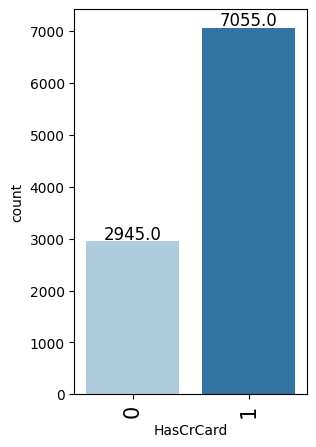

In [ ]:
# View the plot of if the customer has credit card
labeled_barplot(df,'HasCrCard')

* Majority of customers i.e. 70% have credit card
* Approx 29% have not a credit card

#### Observations on estimated salary

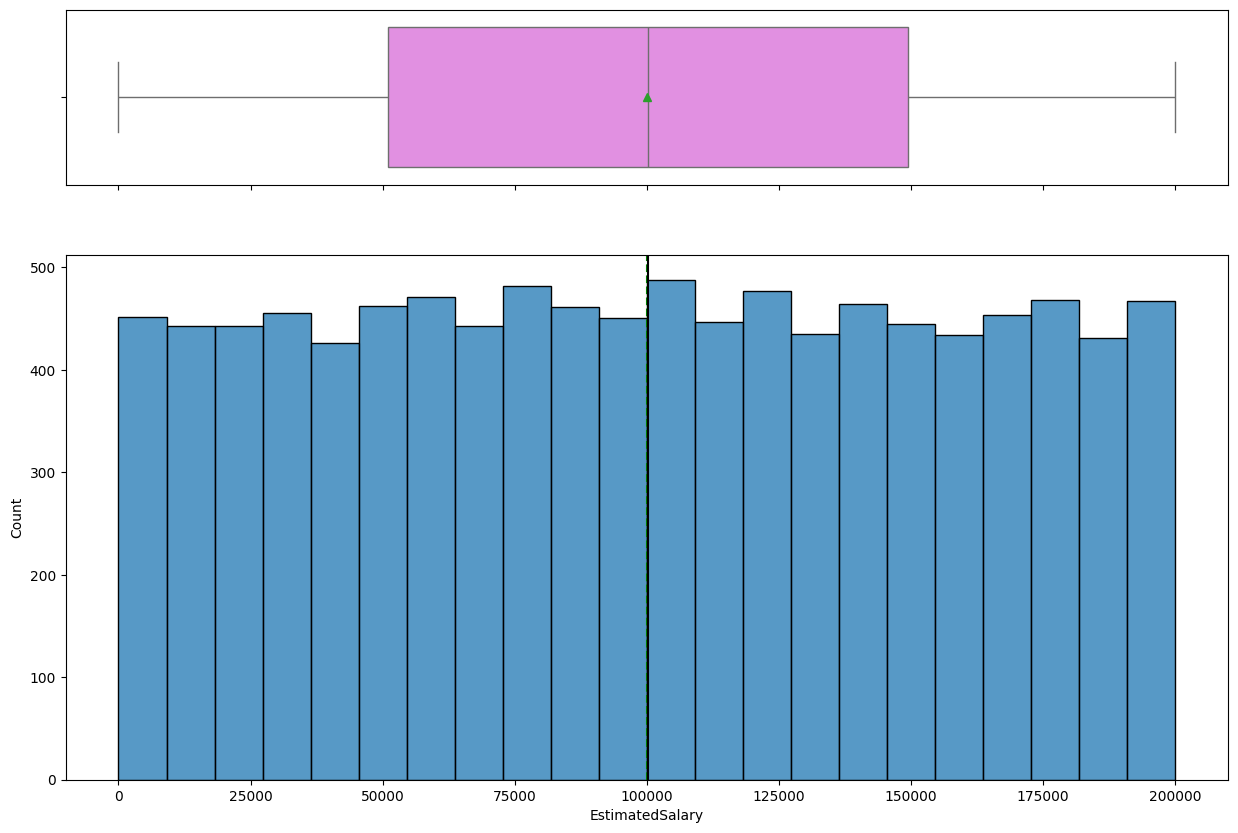

In [ ]:
# View the histogram and the boxplot of the Estimated Salary
histogram_boxplot(df, 'EstimatedSalary')

- The distribution of the salary is normal
- The boxplot shows that there are no outliers

#### Observations on if the customer is active member

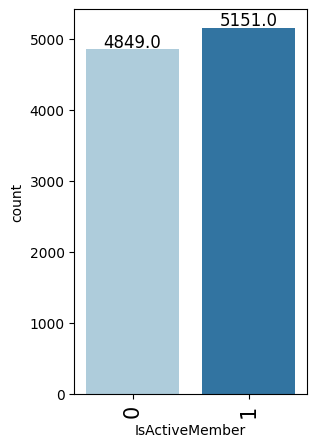

In [ ]:
# View the plot of if customer is an active member
labeled_barplot(df,'IsActiveMember')

* Approx 51% is active member and approx 48% is not

#### Observations on if the customer left the bank

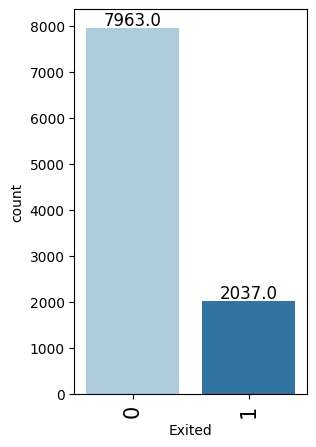

In [ ]:
# View the plot of if customer exited bank
labeled_barplot(df,'Exited')

* Majority of customers i.e. 79% have exited the bank
* Approx 20% have not exited the bank

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation Matrix

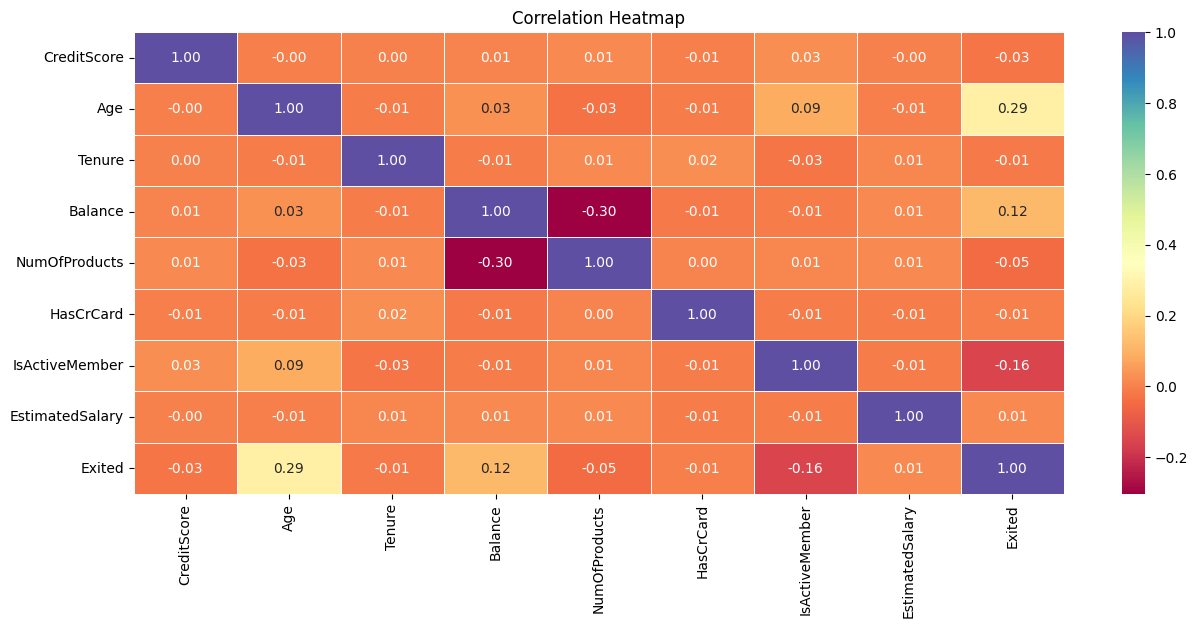

In [ ]:
corr_matrix = df.select_dtypes(include=['number']).corr()

# Create a heatmap
plt.figure(figsize=(15, 6))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

- We notice high negative correlations between: `NumOfProducts` and `Balance`, `Exited` and `isActiveMember`
- We notice high positive correlations between: `Exited` and `Age`, `Exited` and `Balance`

- We will focus more on the high correlations in `Exited` column

#### Impact of the Gender for leaving the bank

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


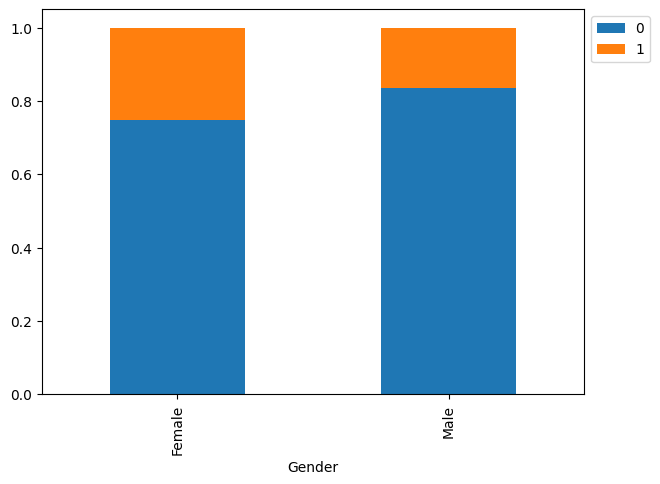

In [ ]:
stacked_barplot(df, 'Gender', 'Exited')

- Gender has impact in leaving the bank
- Females are more likely to leave the bank, compare to Males

#### Impact of the Location for leaving the bank

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


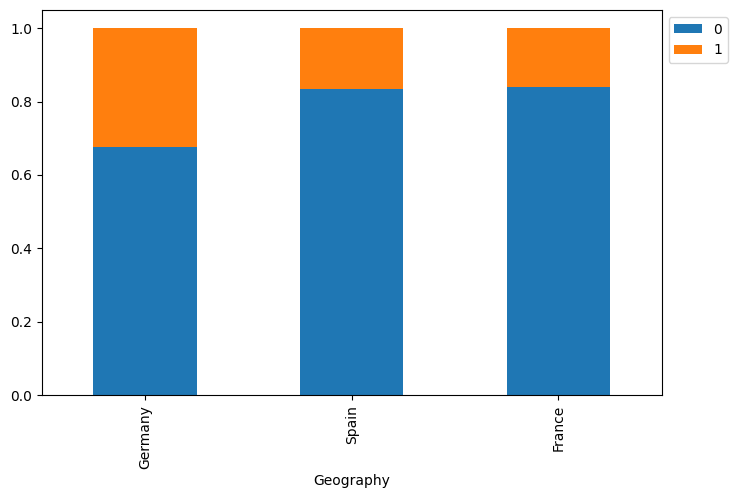

In [ ]:
stacked_barplot(df, 'Geography', 'Exited')

- Customers from Germany are more likely to leave the bank, compare to customers from Spain or France

#### Impact of Age for leaving the bank

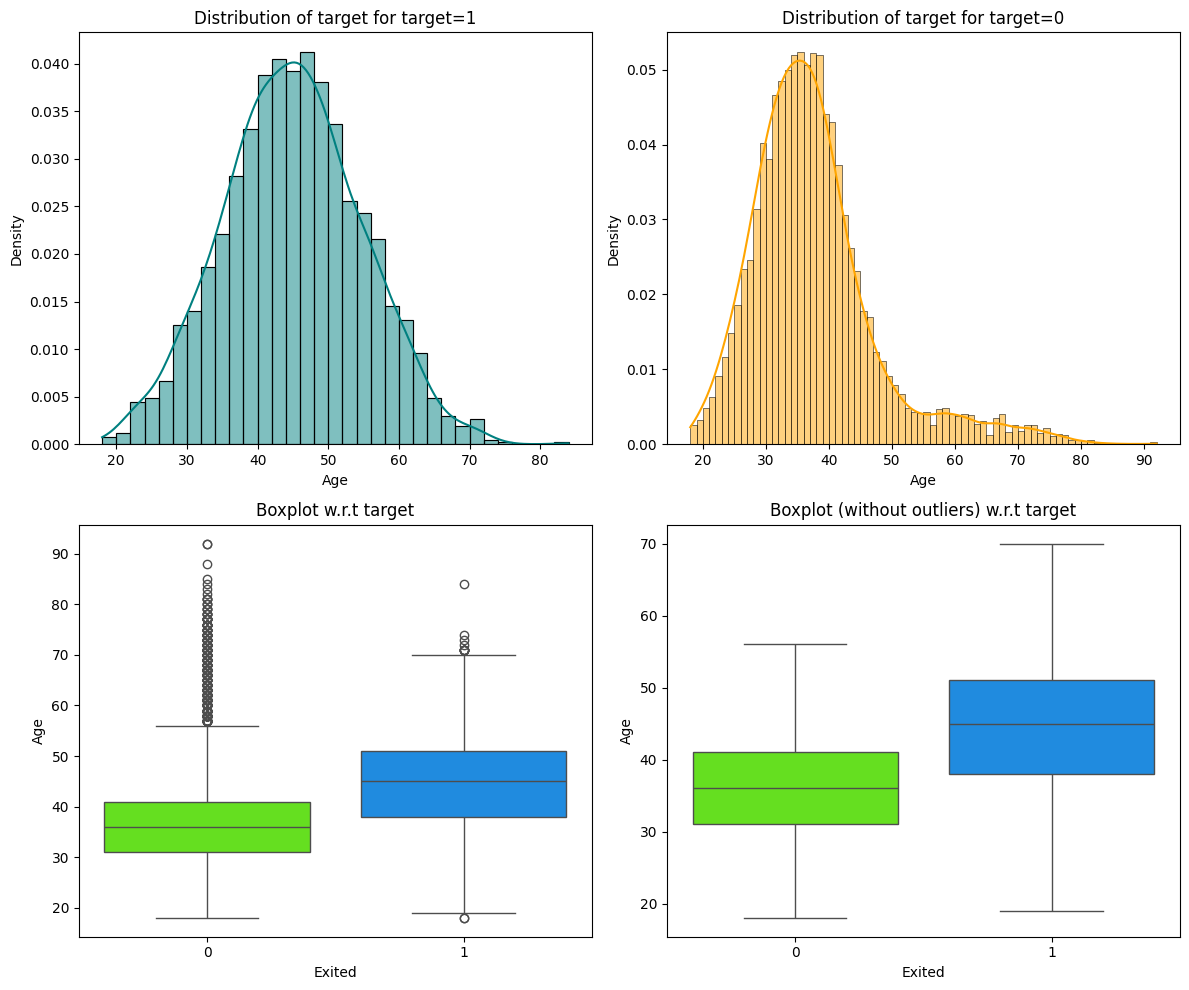

In [ ]:
distribution_plot_wrt_target(df,'Age','Exited')

- Customers with higher age are more likely to leave the bank
- There are a lot of outliers in the non-exited box plot

#### Impact of Account Balance for leaving the bank

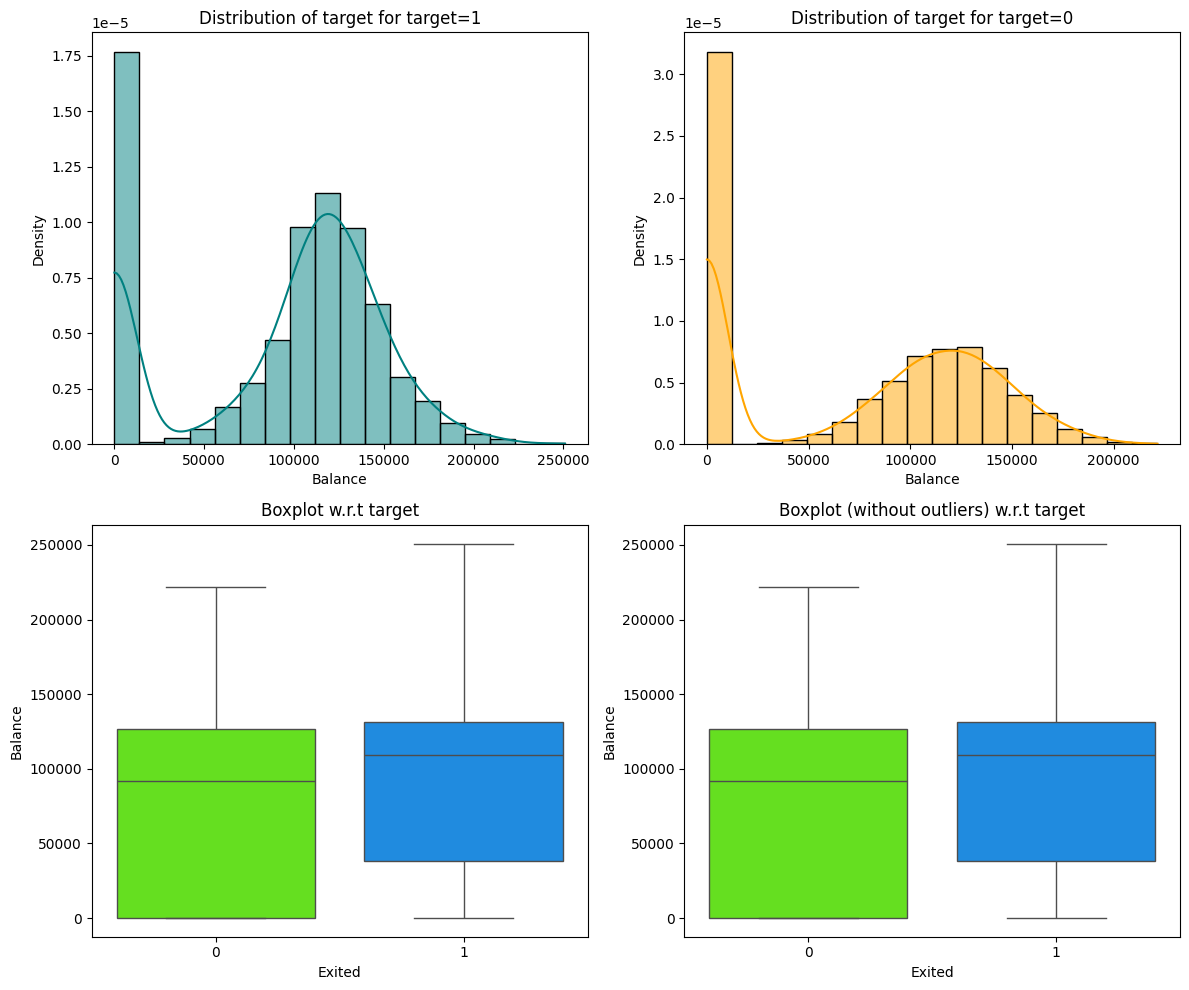

In [ ]:
distribution_plot_wrt_target(df,'Balance','Exited')

- Customers with higher balance are more likely to leave the bank

#### Impact of Active Membership for leaving the bank

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


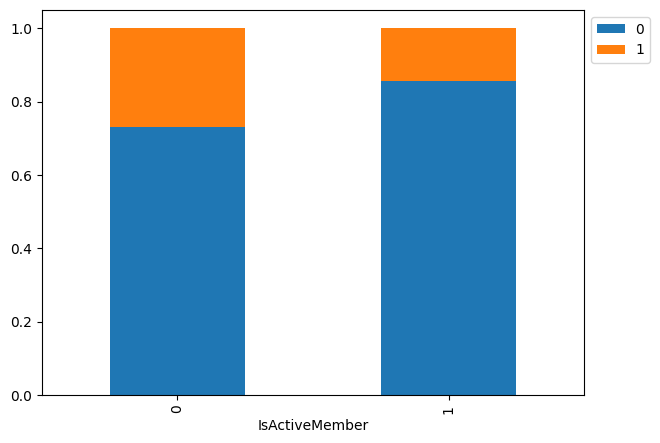

In [ ]:
stacked_barplot(df,'IsActiveMember','Exited')

- Customers who is active members are less likely to leave the bank, compare to non active members

#### Impact of purchased Number of products for leaving the bank

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


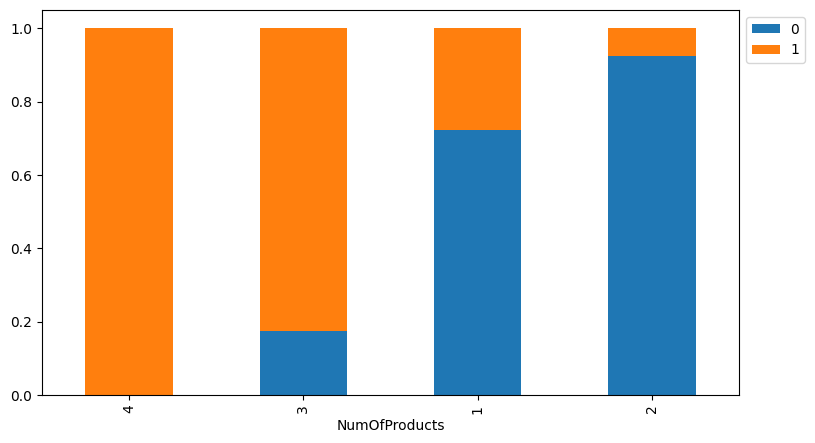

In [ ]:
stacked_barplot(df,'NumOfProducts','Exited')

- Customers who has 4 or 3 products are more likely to stay in the bank
- Customers with 1 or 2 products are more likely to leave

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
# transform objects to dummy variables
df = pd.get_dummies(df,columns=df.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
df = df.astype(float)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [ ]:
# Splitting Independent and dependent variable in X and Y respectively
X = df.drop(['Exited'],axis=1)
y = df['Exited'] # Exited

In [ ]:
# Splitting the dataset into the Training and Testing set.
X_big, X_test, y_big, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42,stratify=y,shuffle = True)

In [ ]:
# Splitting the dataset into the Training and validation set.
X_train, X_val, y_train, y_val = train_test_split(X_big, y_big, test_size = 0.3, random_state = 42,stratify=y_big, shuffle = True)

### Data Normalization

In [ ]:
# Numerical column list
num_cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

# Scaling the data
sc=StandardScaler()

X_train[num_cols_list] = sc.fit_transform(X_train[num_cols_list])
X_val[num_cols_list] = sc.transform(X_val[num_cols_list])
X_test[num_cols_list] = sc.transform(X_test[num_cols_list])

## Model Building

### Model Evaluation Criterion


- We should recall, because the bank needs to identify as many churners as possible
- In banking losing customers is costlier than wrongly identified churners
- We will focus on False Positive values


In [ ]:
# Initialize recall metric
metric = keras.metrics.Recall()

In [ ]:
# A function for plotting the histogram

def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# A function for plotting the confusion matrix

def plot_conf_matrix(true_labels, predicted_labels):
    """
    Generates a confusion matrix with percentage annotations.

    true_labels: Ground truth labels.
    predicted_labels: Model predicted labels.
    """
    cm = confusion_matrix(true_labels, predicted_labels)
    labels = np.array([
        [f"{value:0.0f}\n{value / cm.sum():.2%}" for value in cm.flatten()]
    ]).reshape(cm.shape)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues", linewidths=0.5)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["train recall","validation recall","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

### Neural Network with SGD Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the model
model_0 = Sequential()
# Adding input layer with 64 neurons, relu as activation function
model_0.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
# Adding hidden layer with 32 neurons, relu as activation function
model_0.add(Dense(32, activation='relu'))

# Adding the output layer with one neuron and sigmoid as activation
model_0.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model summary
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Initializing the Optimizer
optimizer = tf.keras.optimizers.SGD(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

start = time.time()
# Fitting the model on train and validation with 50 epochs
history_0 = model_0.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
    epochs=50,
)
end=time.time()

Epoch 1/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.6121 - recall: 0.1648 - val_loss: 0.5811 - val_recall: 0.0727
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.5692 - recall: 0.0525 - val_loss: 0.5525 - val_recall: 0.0182
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.5433 - recall: 0.0167 - val_loss: 0.5347 - val_recall: 0.0036
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5270 - recall: 0.0023 - val_loss: 0.5231 - val_recall: 0.0018
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5163 - recall: 0.0000e+00 - val_loss: 0.5150 - val_recall: 0.0000e+00
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5087 - recall: 0.0000e+00 - val_loss: 0.5089 - val_recall: 0.0000e+00
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5029 - recall: 0.0000e+00 - val_loss: 0.5039 - val_recall: 0.0000e+00
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4982 - recall: 0.0000e+00 - val_loss: 0.4997 

**Loss**

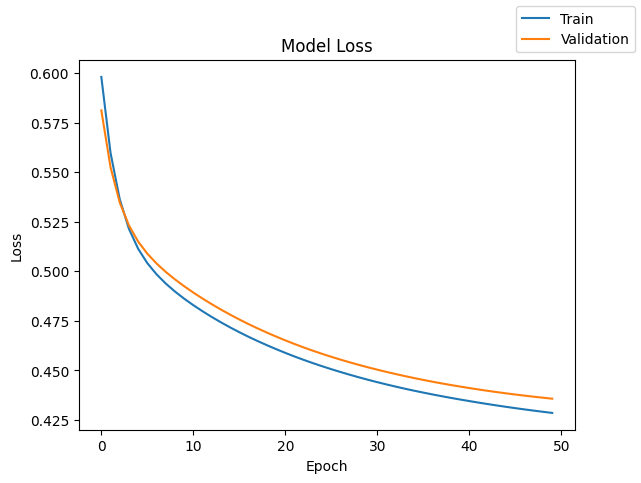

In [ ]:
plot(history_0,'loss')

**Recall**

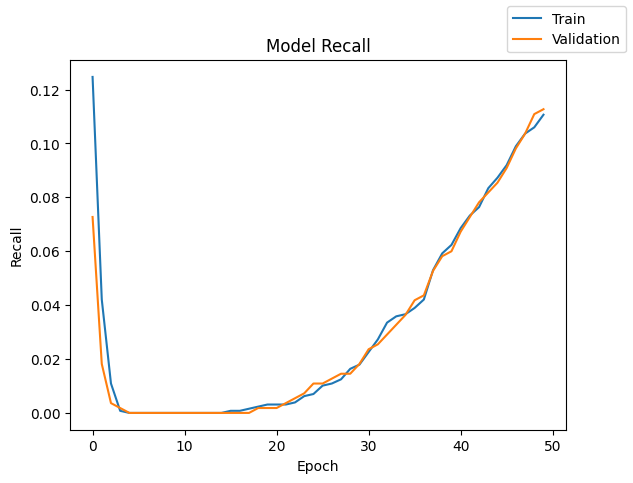

In [ ]:
plot(history_0,'recall')

The train and validation curves seems to be smooth, but the recall is extremelly low in both training and evaluation

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.3)
y_train_pred

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.3)
y_val_pred

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
results.loc["NN with SGD"] = [recall_score(y_train,y_train_pred),recall_score(y_val,y_val_pred),round(end-start,2)]

In [ ]:
results

,train recall,validation recall,time (secs)
NN with SGD,0.50039,0.470909,65.02


**Classification report**

In [ ]:
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      5017
         1.0       0.47      0.50      0.49      1283

    accuracy                           0.78      6300
   macro avg       0.67      0.68      0.67      6300
weighted avg       0.79      0.78      0.79      6300



In [ ]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      2150
         1.0       0.47      0.47      0.47       550

    accuracy                           0.78      2700
   macro avg       0.67      0.67      0.67      2700
weighted avg       0.78      0.78      0.78      2700



**Confusion Matrix**

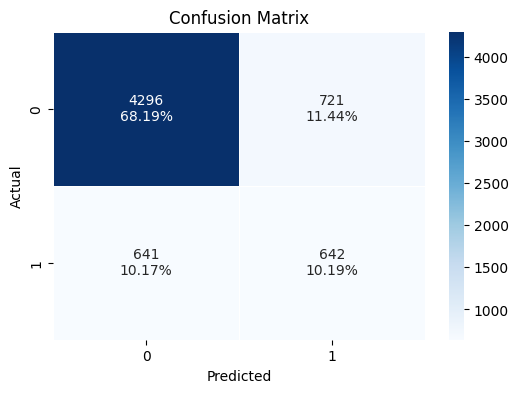

In [ ]:
plot_conf_matrix(y_train, y_train_pred)

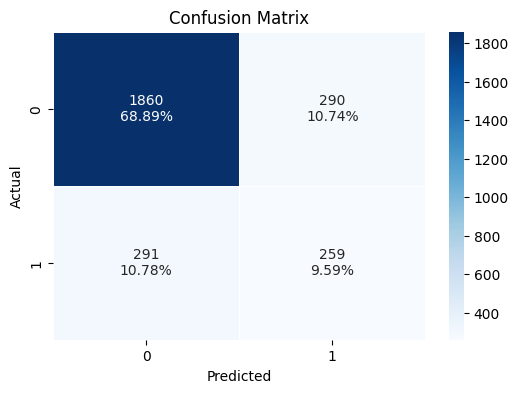

In [ ]:
plot_conf_matrix(y_val, y_val_pred)

- Recall is low: Only captures 50% of positive cases and fails to detect significant number of class one instaces

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the model
model_1 = Sequential()
# Adding input layer with 64 neurons, relu as activation function
model_1.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
# Adding hidden layer with 16 neurons, relu as activation function
model_1.add(Dense(16, activation='relu'))
# Adding hidden layer with 16 neurons, relu as activation function
model_1.add(Dense(16, activation='relu'))
# Adding hidden layer with 8 neurons, relu as activation function
model_1.add(Dense(8, activation='relu'))

# Adding the output layer with one neuron and sigmoid as activation
model_1.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,225 (8.69 KB)

 Trainable params: 2,225 (8.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Initializing the Optimizer
optimizer = tf.keras.optimizers.Adam()
# Compiling the model with 'mse' as loss function and metrics
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

start = time.time()
# Fitting the model on train and validation with 50 epochs
history_1 = model_1.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
    epochs=50,
)
end=time.time()

Epoch 1/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.5077 - recall: 0.0589 - val_loss: 0.4307 - val_recall: 0.0273
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4249 - recall: 0.0679 - val_loss: 0.4172 - val_recall: 0.2073
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4047 - recall: 0.2574 - val_loss: 0.4035 - val_recall: 0.3145
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3851 - recall: 0.3571 - val_loss: 0.3906 - val_recall: 0.3709
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3668 - recall: 0.4084 - val_loss: 0.3834 - val_recall: 0.3982
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3534 - recall: 0.4412 - val_loss: 0.3784 - val_recall: 0.4109
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3434 - recall: 0.4669 - val_loss: 0.3744 - val_recall: 0.4236
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3364 - recall: 0.4818 - val_loss: 0.3726 - val_recall: 0.4327
Epoch 9/

**Model Loss**

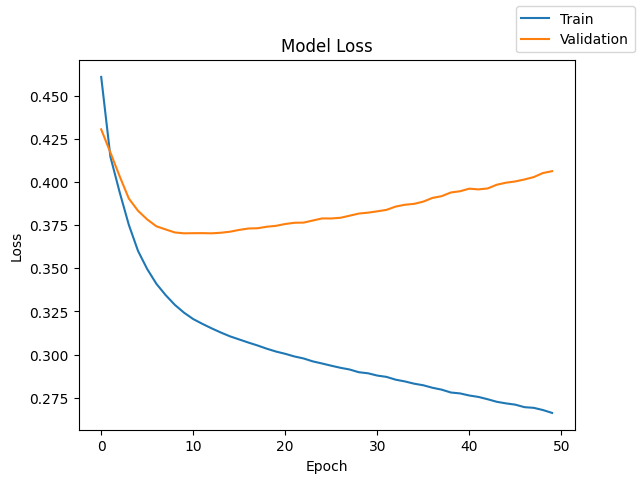

In [ ]:
plot(history_1,'loss')

**Recall**

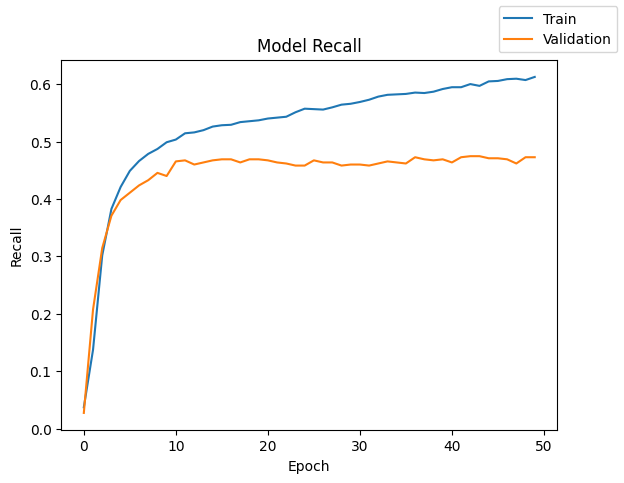

In [ ]:
plot(history_1,'recall')

The train and validation curves are highly overfitting

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.3)
y_train_pred

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_1.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.3)
y_val_pred

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
results.loc["NN with Adam"] = [recall_score(y_train,y_train_pred),recall_score(y_val,y_val_pred),round(end-start,2)]

In [ ]:
results

,train recall,validation recall,time (secs)
NN with SGD,0.500390,0.470909,65.02
NN with Adam,0.734996,0.581818,54.67


**Classification report**

In [ ]:
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      5017
         1.0       0.70      0.73      0.72      1283

    accuracy                           0.88      6300
   macro avg       0.81      0.83      0.82      6300
weighted avg       0.88      0.88      0.88      6300



In [ ]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2150
         1.0       0.57      0.58      0.57       550

    accuracy                           0.82      2700
   macro avg       0.73      0.73      0.73      2700
weighted avg       0.83      0.82      0.83      2700



**Confusion Matrix**

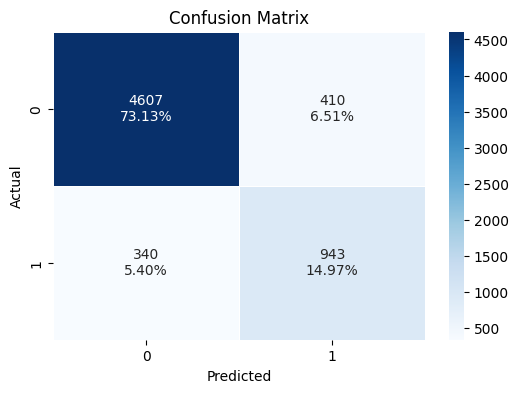

In [ ]:
plot_conf_matrix(y_train, y_train_pred)

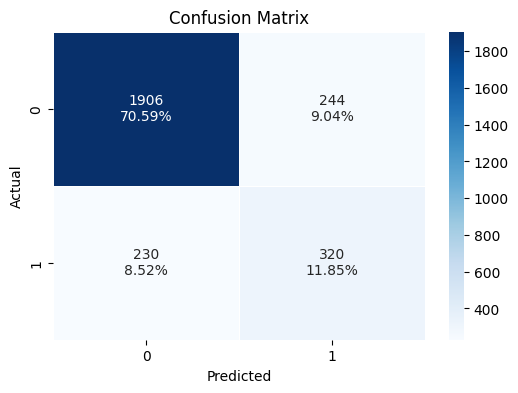

In [ ]:
plot_conf_matrix(y_val, y_val_pred)

Observations
- Significant recall improvement with Adam to 73% for training data and to 58% for validation data
- The model is clearly overfitting

### Neural Network with Adam Optimizer and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the model
model_2 = Sequential()
# Adding input layer with 64 neurons, relu as activation function
model_2.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
# Adding Dropout with 50%
model_2.add(Dropout(0.5))

# Adding the second hidden layer with 16 neurons, relu as activation function
model_2.add(Dense(16, activation='relu'))
# Adding Dropout with 50%
model_2.add(Dropout(0.5))

# Adding hidden layer with 16 neurons, relu as activation function
model_2.add(Dense(16, activation='relu'))
# Adding Dropout with 50%
model_2.add(Dropout(0.5))
# Adding hidden layer with 8 neurons, relu as activation function
model_2.add(Dense(8, activation='relu'))

# Adding the output layer with one neuron and sigmoid as activation
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model summary
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,225 (8.69 KB)

 Trainable params: 2,225 (8.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Initializing the Optimizer
optimizer = tf.keras.optimizers.Adam()
# Compiling the model with 'mse' as loss function and metrics
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

start = time.time()
# Fitting the model on train and validation with 50 epochs
history_2 = model_2.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
    epochs=50,
)
end=time.time()

Epoch 1/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.7003 - recall: 0.4088 - val_loss: 0.5015 - val_recall: 0.0000e+00
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5244 - recall: 0.0011 - val_loss: 0.4687 - val_recall: 0.0000e+00
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4956 - recall: 8.9085e-04 - val_loss: 0.4537 - val_recall: 0.0000e+00
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4816 - recall: 0.0000e+00 - val_loss: 0.4510 - val_recall: 0.0000e+00
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4681 - recall: 5.4006e-04 - val_loss: 0.4463 - val_recall: 0.0000e+00
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4726 - recall: 0.0000e+00 - val_loss: 0.4414 - val_recall: 0.0000e+00
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4668 - recall: 2.4689e-04 - val_loss: 0.4442 - val_recall: 0.0000e+00
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4576 - recall: 0.0036

**Model Loss**

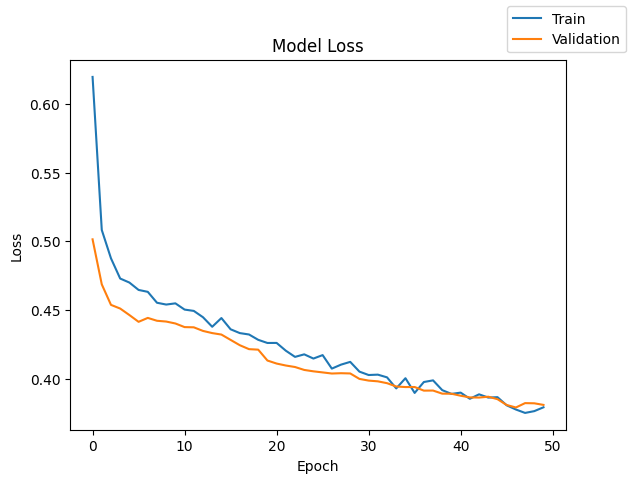

In [ ]:
plot(history_2,'loss')

**Recall**

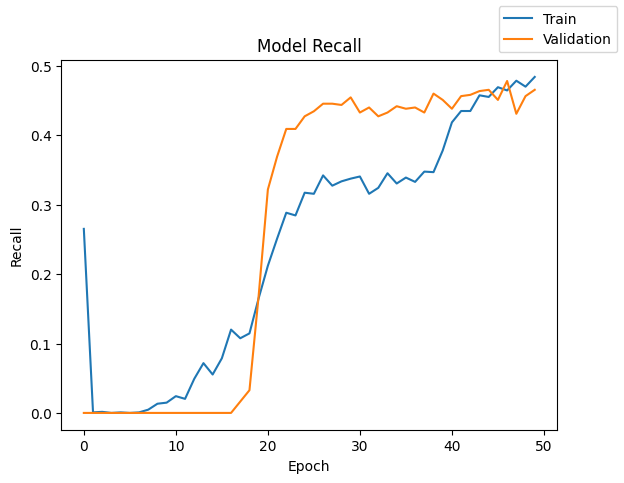

In [ ]:
plot(history_2,'recall')

With Adam the train and validation curves seems to lightly overffit

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.3)
y_train_pred

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_2.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.3)
y_val_pred

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
results.loc["NN with Adam and Dropout"] = [recall_score(y_train,y_train_pred),recall_score(y_val,y_val_pred),round(end-start,2)]

In [ ]:
results

,train recall,validation recall,time (secs)
NN with SGD,0.500390,0.470909,65.02
NN with Adam,0.734996,0.581818,54.67
NN with Adam and Dropout,0.604832,0.530909,60.97


**Classification report**

In [ ]:
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      5017
         1.0       0.69      0.60      0.64      1283

    accuracy                           0.86      6300
   macro avg       0.80      0.77      0.78      6300
weighted avg       0.86      0.86      0.86      6300



In [ ]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      2150
         1.0       0.62      0.53      0.57       550

    accuracy                           0.84      2700
   macro avg       0.75      0.72      0.74      2700
weighted avg       0.83      0.84      0.83      2700



**Confusion Matrix**

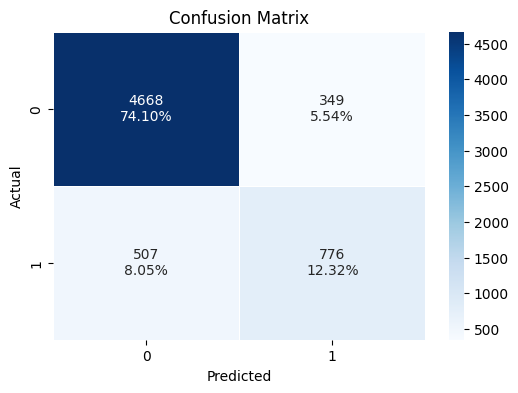

In [ ]:
plot_conf_matrix(y_train, y_train_pred)

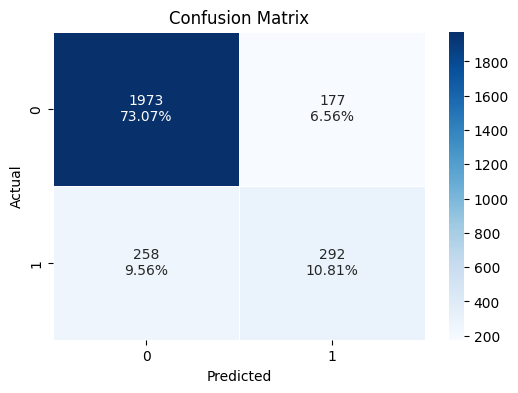

In [ ]:
plot_conf_matrix(y_val, y_val_pred)

Observations
- Improved generalization with gap = 0.074
- Recall is ~53% for validation data and ~64% for training data

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
sm  = SMOTE(random_state=42)

X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the model
model_3 = Sequential()
# Adding input layer with 64 neurons, relu as activation function
model_3.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Adding the first hidden layer with 16 neurons, relu as activation function
model_3.add(Dense(16, activation='relu'))
# Adding hidden layer with 8 neurons, relu as activation function
model_3.add(Dense(8, activation='relu'))
# Adding hidden layer with 8 neurons, relu as activation function
model_3.add(Dense(8, activation='relu'))


# Adding the output layer with one neuron and sigmoid as activation
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model summary
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,025 (7.91 KB)

 Trainable params: 2,025 (7.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Initializing the Optimizer
optimizer = tf.keras.optimizers.SGD(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

start = time.time()
# Fitting the model on train and validation with 50 epochs
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_val,y_val),
    epochs=50,
)
end=time.time()

Epoch 1/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.7105 - recall: 0.4520 - val_loss: 0.7166 - val_recall: 0.6818
Epoch 2/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6987 - recall: 0.7302 - val_loss: 0.7132 - val_recall: 0.8073
Epoch 3/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6896 - recall: 0.8077 - val_loss: 0.7060 - val_recall: 0.8309
Epoch 4/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6826 - recall: 0.8064 - val_loss: 0.6979 - val_recall: 0.8055
Epoch 5/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6769 - recall: 0.7844 - val_loss: 0.6896 - val_recall: 0.7709
Epoch 6/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6715 - recall: 0.7525 - val_loss: 0.6809 - val_recall: 0.7309
Epoch 7/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6658 - recall: 0.7271 - val_loss: 0.6719 - val_recall: 0.6964
Epoch 8/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6596 - recall: 0.7063 - val_loss: 0.6631 - val_recall: 0.6745
Epoch 9/

**Model Loss**

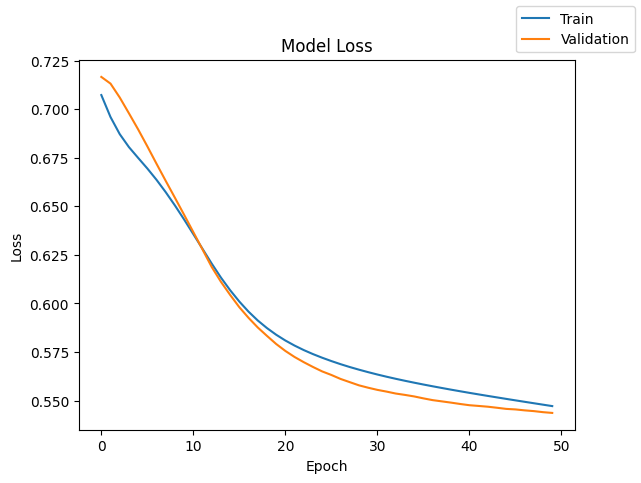

In [ ]:
plot(history_3,'loss')

**Recall**

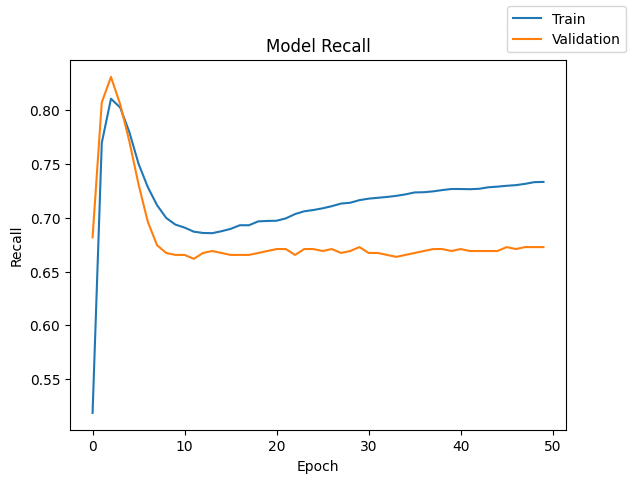

In [ ]:
plot(history_3,'recall')

With applying SMOTE the train and validation curves seems to overfit less

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_3.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.3)
y_train_pred

314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_3.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.3)
y_val_pred

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
results.loc["NN with SMOTE and SGD"] = [recall_score(y_train_smote,y_train_pred),recall_score(y_val,y_val_pred),round(end-start,2)]

In [ ]:
results

,train recall,validation recall,time (secs)
NN with SGD,0.500390,0.470909,65.02
NN with Adam,0.734996,0.581818,54.67
NN with Adam and Dropout,0.604832,0.530909,60.97
NN with SMOTE and SGD,0.886785,0.823636,63.99


**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.82      0.51      0.62      5017
         1.0       0.64      0.89      0.74      5017

    accuracy                           0.70     10034
   macro avg       0.73      0.70      0.68     10034
weighted avg       0.73      0.70      0.68     10034



In [ ]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.52      0.66      2150
         1.0       0.30      0.82      0.44       550

    accuracy                           0.58      2700
   macro avg       0.61      0.67      0.55      2700
weighted avg       0.79      0.58      0.62      2700



**Confusion Matrix**

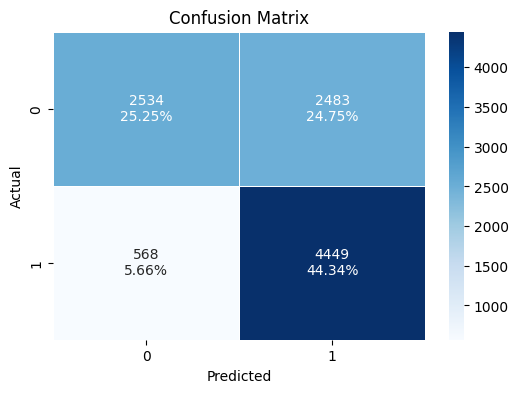

In [ ]:
plot_conf_matrix(y_train_smote, y_train_pred)

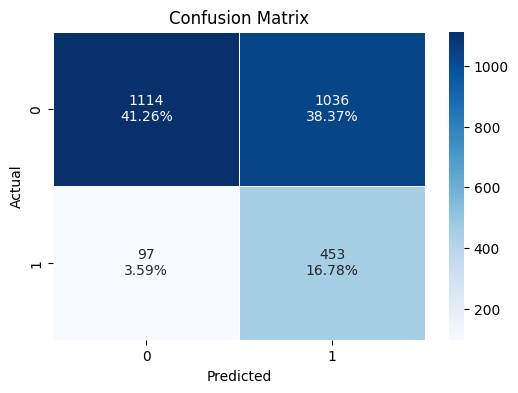

In [ ]:
plot_conf_matrix(y_val, y_val_pred)

Observations:
- Significant Recall Improvement: Training and validation recall jumped to 89% and 82% respectively
- SMOTE seems more effective

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the model
model_4 = Sequential()
# Adding input layer with 64 neurons, relu as activation function
model_4.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Adding the second hidden layer with 16 neurons, relu as activation function
model_4.add(Dense(16, activation='relu'))
# Adding hidden layer with 16 neurons, relu as activation function
model_4.add(Dense(16, activation='relu'))
# Adding hidden layer with 8 neurons, relu as activation function
model_4.add(Dense(8, activation='relu'))

# Adding the output layer with one neuron and sigmoid as activation
model_4.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model summary
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,225 (8.69 KB)

 Trainable params: 2,225 (8.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Initializing the Optimizer
optimizer = tf.keras.optimizers.Adam(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

start = time.time()
# Fitting the model on train and validation with 50 epochs
history_4 = model_4.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_val,y_val),
    epochs=50,
)
end=time.time()

Epoch 1/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.6262 - recall: 0.5837 - val_loss: 0.4775 - val_recall: 0.5600
Epoch 2/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5222 - recall: 0.7198 - val_loss: 0.4492 - val_recall: 0.5291
Epoch 3/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4865 - recall: 0.7414 - val_loss: 0.4461 - val_recall: 0.5745
Epoch 4/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4599 - recall: 0.7629 - val_loss: 0.4423 - val_recall: 0.6091
Epoch 5/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4391 - recall: 0.7885 - val_loss: 0.4427 - val_recall: 0.6236
Epoch 6/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4207 - recall: 0.7989 - val_loss: 0.4408 - val_recall: 0.6200
Epoch 7/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4057 - recall: 0.8149 - val_loss: 0.4388 - val_recall: 0.6000
Epoch 8/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3937 - recall: 0.8249 - val_loss: 0.4452 - val_recall: 0.6200
Epoch 9/

**Model Loss**

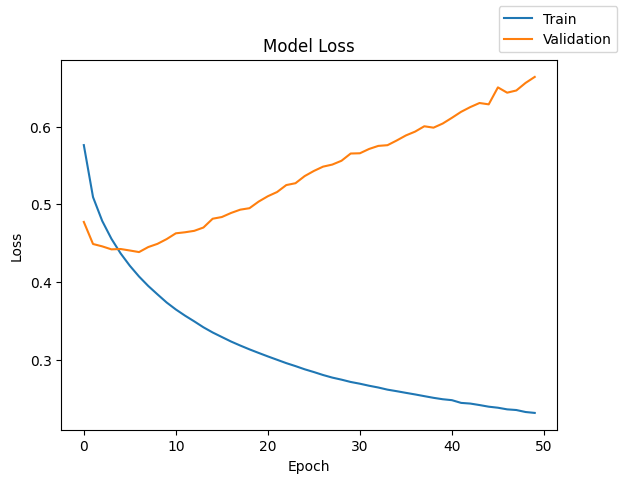

In [ ]:
plot(history_4,'loss')

**Recall**

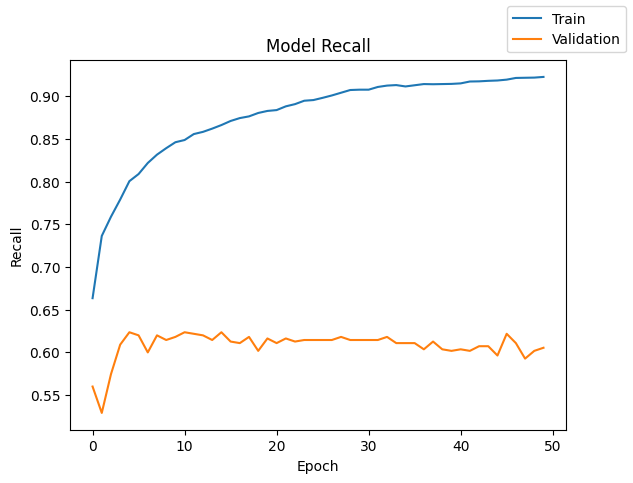

In [ ]:
plot(history_4,'recall')

With SMOTE and Adam the train and validation curves seems to highly overfit

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_4.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.3)
y_train_pred

314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_4.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.3)
y_val_pred

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
results.loc["NN with SMOTE and Adam"] = [recall_score(y_train_smote,y_train_pred),recall_score(y_val,y_val_pred),round(end-start,2)]

In [ ]:
results

,train recall,validation recall,time (secs)
NN with SGD,0.500390,0.470909,65.02
NN with Adam,0.734996,0.581818,54.67
NN with Adam and Dropout,0.604832,0.530909,60.97
NN with SMOTE and SGD,0.886785,0.823636,63.99
NN with SMOTE and Adam,0.970899,0.690909,69.20


**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88      5017
         1.0       0.84      0.97      0.90      5017

    accuracy                           0.89     10034
   macro avg       0.90      0.89      0.89     10034
weighted avg       0.90      0.89      0.89     10034



In [ ]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82      2150
         1.0       0.41      0.69      0.52       550

    accuracy                           0.74      2700
   macro avg       0.66      0.72      0.67      2700
weighted avg       0.80      0.74      0.76      2700



**Confusion Matrix**

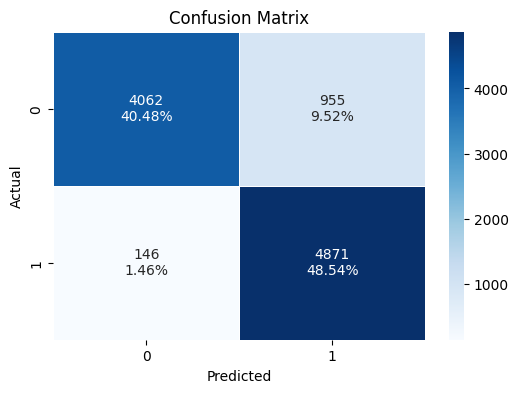

In [ ]:
plot_conf_matrix(y_train_smote, y_train_pred)

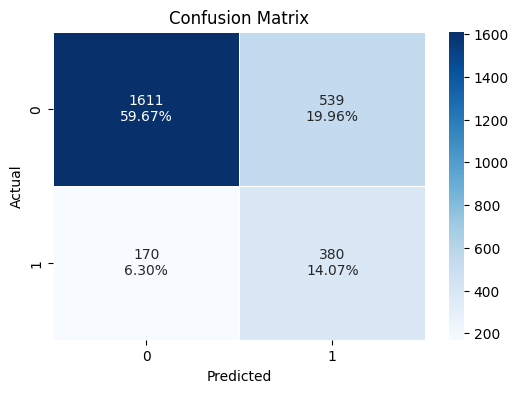

In [ ]:
plot_conf_matrix(y_val, y_val_pred)

Observations:
- Extreme Overfitting with SMOTE and Adam: Training recall jumped to 97 % and validation recall to 69%

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the model
model_5 = Sequential()
# Adding input layer with 16 neurons, relu as activation function
model_5.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
# Adding Dropout with 50%
model_5.add(Dropout(0.2))
# Adding hidden layer with 16 neurons, relu as activation function
model_5.add(Dense(16, activation='relu'))
# Adding Dropout with 50%
model_5.add(Dropout(0.2))
# Adding hidden layer with 4 neurons, relu as activation function
model_5.add(Dense(4, activation='relu'))


# Adding the output layer with one neuron and sigmoid as activation
model_5.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model summary
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 537 (2.10 KB)

 Trainable params: 537 (2.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Initializing the Optimizer
optimizer = tf.keras.optimizers.Adam(0.00001)
# Compiling the model with 'mse' as loss function and metrics
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

start = time.time()
# Fitting the model on train and validation with 50 epochs
history_5 = model_5.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_val,y_val),
    epochs=50,
)
end=time.time()

Epoch 1/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.6837 - recall: 0.4605 - val_loss: 0.6410 - val_recall: 0.3782
Epoch 2/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6849 - recall: 0.4124 - val_loss: 0.6413 - val_recall: 0.3945
Epoch 3/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6829 - recall: 0.4283 - val_loss: 0.6417 - val_recall: 0.4091
Epoch 4/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6823 - recall: 0.4355 - val_loss: 0.6417 - val_recall: 0.4255
Epoch 5/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6806 - recall: 0.4474 - val_loss: 0.6415 - val_recall: 0.4400
Epoch 6/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6778 - recall: 0.4703 - val_loss: 0.6408 - val_recall: 0.4418
Epoch 7/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6800 - recall: 0.4678 - val_loss: 0.6405 - val_recall: 0.4527
Epoch 8/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6767 - recall: 0.4830 - val_loss: 0.6396 - val_recall: 0.4545
Epoch 9

**Model Loss**

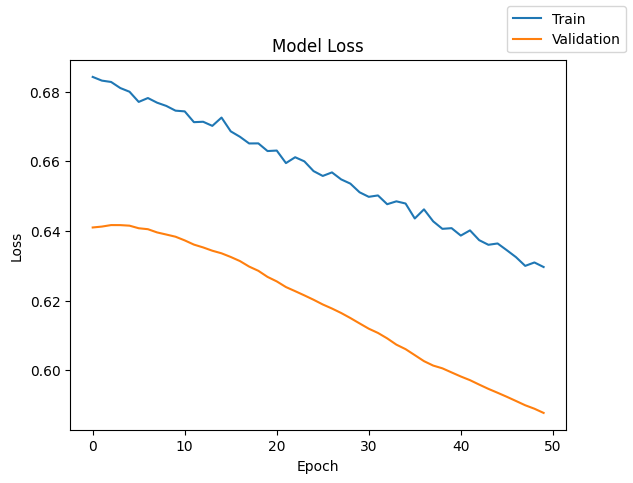

In [ ]:
plot(history_5,'loss')

**Recall**

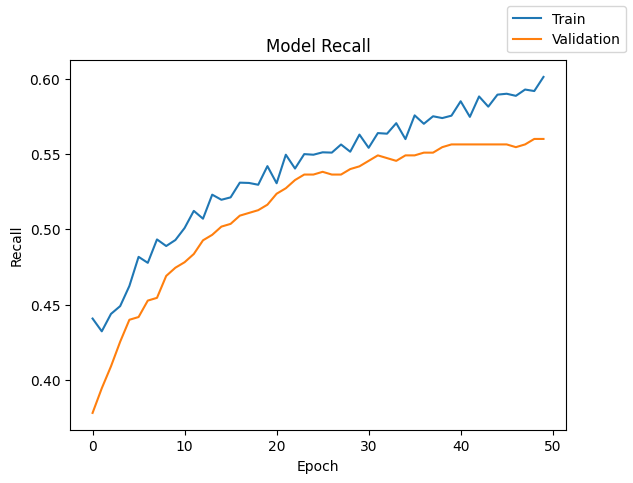

In [ ]:
plot(history_5,'recall')

With applying dropout the train and validation curves seems to be overfit less

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_5.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.4)
y_train_pred

314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_5.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.4)
y_val_pred

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
results.loc["NN with SMOTE,Dropout and Adam"] = [recall_score(y_train_smote,y_train_pred),recall_score(y_val,y_val_pred),round(end-start,2)]

In [ ]:
results

,train recall,validation recall,time (secs)
NN with SGD,0.500390,0.470909,65.02
NN with Adam,0.734996,0.581818,54.67
NN with Adam and Dropout,0.604832,0.530909,60.97
NN with SMOTE and SGD,0.886785,0.823636,63.99
NN with SMOTE and Adam,0.970899,0.690909,69.20
"NN with SMOTE,Dropout and Adam",0.858083,0.825455,66.90


**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.77      0.49      0.60      5017
         1.0       0.63      0.86      0.72      5017

    accuracy                           0.67     10034
   macro avg       0.70      0.67      0.66     10034
weighted avg       0.70      0.67      0.66     10034



In [ ]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.49      0.64      2150
         1.0       0.29      0.83      0.43       550

    accuracy                           0.56      2700
   macro avg       0.61      0.66      0.54      2700
weighted avg       0.79      0.56      0.60      2700



**Confusion Matrix**

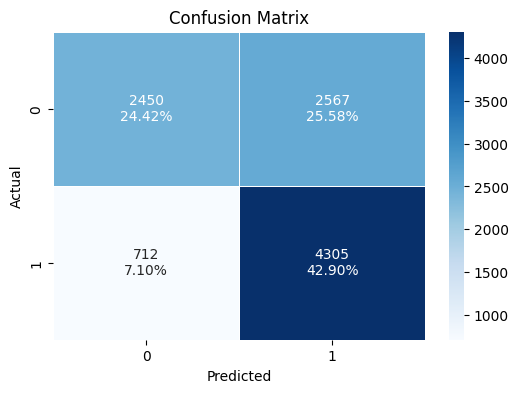

In [ ]:
plot_conf_matrix(y_train_smote, y_train_pred)

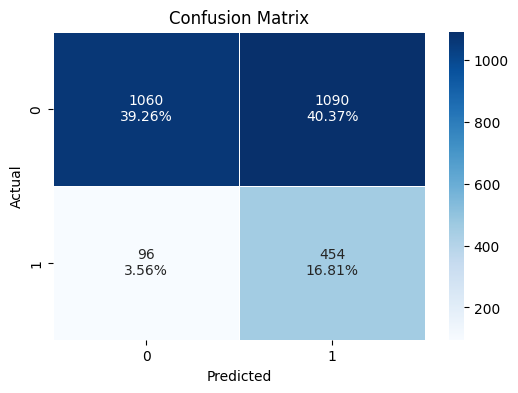

In [ ]:
plot_conf_matrix(y_val, y_val_pred)

Observations
- Best Generalization: Training recall dropped to 85% and validation recall increased to 82%
- Dropout helped at overfitting

## Model Performance Comparison and Final Model Selection

In [ ]:
print('Training - Validation performance comparison')
print(results)

Training - Validation performance comparison
                                train recall  validation recall  time (secs)
NN with SGD                         0.500390           0.470909        65.02
NN with Adam                        0.734996           0.581818        54.67
NN with Adam and Dropout            0.604832           0.530909        60.97
NN with SMOTE and SGD               0.886785           0.823636        63.99
NN with SMOTE and Adam              0.970899           0.690909        69.20
NN with SMOTE,Dropout and Adam      0.858083           0.825455        66.90


- Training recall is consistently higher than evaluation recall which indicates overffiting
- NN with SMOTE and Adam achieves highest training recall but low validation recall
- NN with SMOTE, Dropout, and Adam has the best validation recall with the best generalization
- Training time is highest with SMOTE (because of the complexity)

**Select Best model**

We will select the NN with SMOTE,Dropout and Adam with the best recall and less overfitting

In [ ]:
y_test_pred = model_5.predict(X_test)
y_test_pred = (y_test_pred > 0.4)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.48      0.63       796
         1.0       0.29      0.83      0.43       204

    accuracy                           0.55      1000
   macro avg       0.61      0.66      0.53      1000
weighted avg       0.79      0.55      0.59      1000



- High recall of 0.83 for class 1 (churners),aligning with the bank’s priority to catch most churning customers, but precision is low at 0.29, indicating many false positives.


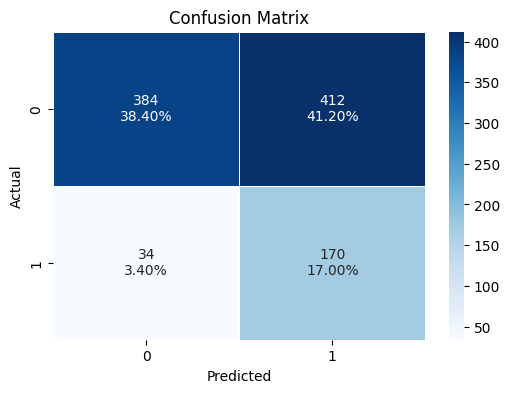

In [ ]:
plot_conf_matrix(y_test, y_test_pred)

- The model identifies correctly 170 of 204 churners, yielding a recall of 83% for class 1 which alligns with bank's goal

## Actionable Insights and Business Recommendations

* Females are more likely to leave the bank compare to males
  - Recommendation: Investigate the specific pain points of famale customers or offer extra services and offers for females

- Customers from Germany are more likely to leave the bank
  - Recommendation: Customize marketing strategies for specific locations, addressing specific local preferences that may be influence churm

- Old Customers are more likely to leave the bank
  - Recommendation: Add plans targetted to older ages like retirement plans, etc.

- Customers with high balance are more likely to leave the bank
  - Recommendation: Add programs that reward customers with higher balances

- Customers with active membership are less likely to leave the bank
  - Recommendation: Develop more rewards for active memberships

- Customers with high number of products are less likely to leave the bank
  - Recommendation: Encourage customers with 1-2 products to buy more products with special deals on extra products


<font size=6 color='blue'>Power Ahead</font>
___